<a href="https://colab.research.google.com/github/ErikDeniz/Computacion-Inteligente/blob/main/Clasificador_de_embarcaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificador de buques con redes neuronales

En este programa se creará un clasificador de imágenes de tipos de buques, basado en el uso de redes neuronales.

## Datos:

La base de datos utilizada contiene imágenes de diferentes tipos de buques como cruceros, kayaks, veleros o góndolas.

Primero importamos la base de datos de Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()      #Comprobamos si estamos usando una gpu para acelerar el proceso.

'/device:GPU:0'

Mostramos una imagen de la carpeta cruceros, así como las distintas categorías que estamos usando (cruise ship, gondola, kayak, sailboat).

'cruise ship'   gondola   kayak   sailboat


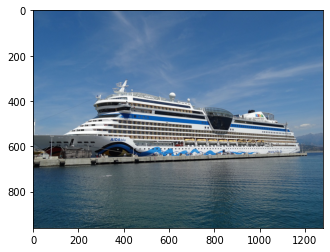

In [ ]:
!ls "/content/drive/MyDrive/Master SIANI/Master erik/CI/Ships/boats"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/MyDrive/Master SIANI/Master erik/CI/Ships/boats/cruise ship/aida-ship-cruise-vacations-port-802359.jpg', 'r')
imshow(np.asarray(pil_im))

In [ ]:
# DATA SOURCE --------------------------------------------------

image_size = (224, 224)
batch_size = 30

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Master SIANI/Master erik/CI/Ships/boats",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Master SIANI/Master erik/CI/Ships/boats",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

Found 1224 files belonging to 4 classes.
Using 980 files for training.
Found 1224 files belonging to 4 classes.
Using 244 files for validation.


##Red neuronal

El primer enfoque se realiza usando una red neuronal convolutiva usando capas de maxpooling y de dropout con capas densas a la salida.

Se entrena esta red con una función earlystopping que ddetenga el entrenamiento para evitar overfitting.

### Entrenamiento:

In [ ]:
# MODEL --------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.Sequential()
model.add(Rescaling(scale=(1./127.5),
                    offset=-1, 
                    input_shape=(224, 224, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

In [ ]:
# TRAINING --------------------------------------------------

epochs = 200

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

h = model.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/200
33/33 [==============================] - 133s 4s/step - loss: 2.2419 - accuracy: 0.3694 - val_loss: 1.3465 - val_accuracy: 0.3730
Epoch 2/200
33/33 [==============================] - 9s 232ms/step - loss: 1.2338 - accuracy: 0.4122 - val_loss: 1.2369 - val_accuracy: 0.4262
Epoch 3/200
33/33 [==============================] - 9s 228ms/step - loss: 1.1754 - accuracy: 0.4745 - val_loss: 1.1846 - val_accuracy: 0.4590
Epoch 4/200
33/33 [==============================] - 9s 227ms/step - loss: 1.1003 - accuracy: 0.5459 - val_loss: 1.1267 - val_accuracy: 0.4836
Epoch 5/200
33/33 [==============================] - 9s 229ms/step - loss: 1.0181 - accuracy: 0.5888 - val_loss: 1.0771 - val_accuracy: 0.5287
Epoch 6/200
33/33 [==============================] - 9s 228ms/step - loss: 0.9785 - accuracy: 0.5949 - val_loss: 1.0703 - val_accuracy: 0.5820
Epoch 7/200
33/33 [==============================] - 9s 225ms/step - loss: 0.9279 - accuracy: 0.6235 - val_loss: 1.0576 - val_accuracy: 0.5574


Tras el entrenamiento obtenemos el resultado del aprendizaje de la red.

### Evaluación de los resultados 



En este caso después de entrenar la red, se obtiene un accuracy del 60%, lo cual todavía no es un resultado suficientemente bueno.

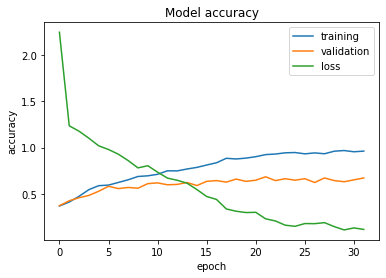

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

              precision    recall  f1-score   support

           0     0.7561    0.5536    0.6392        56
           1     0.6250    0.7609    0.6863        46
           2     0.5714    0.7111    0.6337        45
           3     0.7582    0.7113    0.7340        97

    accuracy                         0.6844       244
   macro avg     0.6777    0.6842    0.6733       244
weighted avg     0.6982    0.6844    0.6848       244



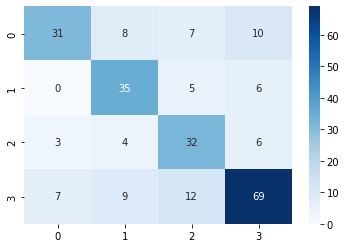

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

In [ ]:
img = keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/Master SIANI/Master erik/CI/Ships/boats/cruise ship/cruise-cruise-ship-vacations-sea-port-sh-823668.jpg', target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(np.argmax(predictions[0]))

0


## Prueba con Transfer learning

Puesto que los resultados anteriores no eran suficientemente buenos, se prueba a usar transfer learning para mejorar los resultados obtenidos con la red creada en el apartado anterior.

En este caso se usará la red VGG16 para hacer transfer learning a este proyecto.

### Entrenamiento:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3))

# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)

x = keras.layers.GlobalAveragePooling2D()(x)

# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.Dense(256, activation='relu')(x)
outputs = keras.layers.Dense(4, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

epochs = 10

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=4, restore_best_weights=True)

h = model.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/10
33/33 [==============================] - 21s 393ms/step - loss: 1.2088 - accuracy: 0.7704 - val_loss: 0.7338 - val_accuracy: 0.8770
Epoch 2/10
33/33 [==============================] - 10s 263ms/step - loss: 0.2818 - accuracy: 0.9306 - val_loss: 0.5653 - val_accuracy: 0.8893
Epoch 3/10
33/33 [==============================] - 10s 266ms/step - loss: 0.1103 - accuracy: 0.9673 - val_loss: 0.5433 - val_accuracy: 0.8770
Epoch 4/10
33/33 [==============================] - 10s 265ms/step - loss: 0.0740 - accuracy: 0.9786 - val_loss: 0.5406 - val_accuracy: 0.9057
Epoch 5/10
33/33 [==============================] - 10s 269ms/step - loss: 0.0364 - accuracy: 0.9918 - val_loss: 0.4306 - val_accuracy: 0.9098
Epoch 6/10
33/33 [==============================] - 10s 261ms/step - loss: 0.0428 - accuracy: 0.9939 - val_loss: 0.4673 - val_accuracy: 0.8934
Epoch 7/10
33/33 [==============================] - 10s 266ms/step - loss: 0.0160 - accuracy: 0.9990 - val_loss: 0.4567 - val_accuracy: 0.9057

### Evaluación de los resultados:

Como se puede observar en este caso el transfer learning ha mejorado sustancialmente el resultado. Obteniendo ahora un resultado del 90% de accuracy.

              precision    recall  f1-score   support

           0     0.9268    1.0000    0.9620        38
           1     0.9107    0.9444    0.9273        54
           2     0.8929    0.8197    0.8547        61
           3     0.9231    0.9231    0.9231        91

    accuracy                         0.9139       244
   macro avg     0.9134    0.9218    0.9168       244
weighted avg     0.9134    0.9139    0.9130       244



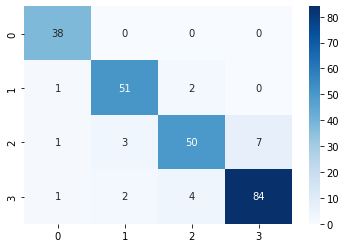

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

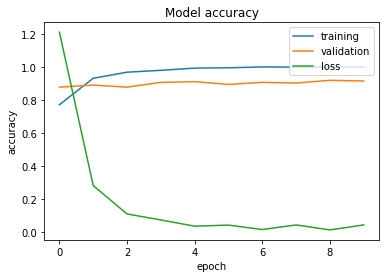

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

## Transfer learning + Fine tuning

Aunque el transfer learning ha arrojado mejores resultados, todavía se puede intentar mejorar con técnicas como el fine tuning, que permite aprovechar las capas preentrenadas de la red que transferimos pero también entrenar unas pocas con nuestros datos para mejorar la precisión. 

En este caso se entrenan las últimas dos capas con los datos de entrada, mientras que el resto se deja con los pesos preentrenados.

### Entrenamiento: 

In [ ]:
img = keras.preprocessing.image.load_img(
    '/content/drive/MyDrive/Master SIANI/Master erik/CI/Ships/boats/gondola/rialto-bridge-canal-water-venice-999962.jpg', target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(np.argmax(predictions[0]))

1


In [ ]:
base_model.summary()
# Se observan cuantas capas tiene la red VGG16 para elegir cuáles entrenar

print("non_trainable_weights:", len(base_model.non_trainable_weights))

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

# free all layer except the desired layers
# which is in [ ... ]
for layer in base_model.layers:
    if layer.name not in ['block5_conv3', 'block5_pool']:
        layer.trainable = False

inputs = keras.Input(shape=(224, 224, 3))

# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)

x = keras.layers.GlobalAveragePooling2D()(x)

# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.Dense(256, activation='relu')(x)
outputs = keras.layers.Dense(4, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)
 
print("non_trainable_weights:", len(model.non_trainable_weights))


non_trainable_weights: 24


In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

epochs = 10

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=4, restore_best_weights=True)

h = model.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/10
33/33 [==============================] - 12s 279ms/step - loss: 4.3939 - accuracy: 0.6959 - val_loss: 0.4202 - val_accuracy: 0.8934
Epoch 2/10
33/33 [==============================] - 10s 269ms/step - loss: 0.4114 - accuracy: 0.9122 - val_loss: 0.5829 - val_accuracy: 0.8770
Epoch 3/10
33/33 [==============================] - 10s 267ms/step - loss: 0.1854 - accuracy: 0.9602 - val_loss: 0.4322 - val_accuracy: 0.9057
Epoch 4/10
33/33 [==============================] - 11s 271ms/step - loss: 0.0948 - accuracy: 0.9786 - val_loss: 0.3563 - val_accuracy: 0.9262
Epoch 5/10
33/33 [==============================] - 11s 270ms/step - loss: 0.0299 - accuracy: 0.9918 - val_loss: 0.4081 - val_accuracy: 0.9262
Epoch 6/10
33/33 [==============================] - 10s 269ms/step - loss: 0.2305 - accuracy: 0.9612 - val_loss: 0.5729 - val_accuracy: 0.8934
Epoch 7/10
33/33 [==============================] - 10s 268ms/step - loss: 0.1781 - accuracy: 0.9684 - val_loss: 0.6188 - val_accuracy: 0.8975

### Evaluación de los resultados 

En este caso se demuestra que con fine tuningse ha obtenido un resultado ligeramente mejor, llegando a un 93% de precisión.

              precision    recall  f1-score   support

           0     0.9512    1.0000    0.9750        39
           1     0.9107    0.9623    0.9358        53
           2     0.8393    0.8868    0.8624        53
           3     0.9780    0.8990    0.9368        99

    accuracy                         0.9262       244
   macro avg     0.9198    0.9370    0.9275       244
weighted avg     0.9290    0.9262    0.9265       244



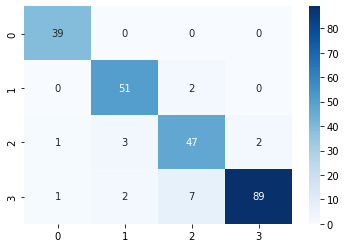

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

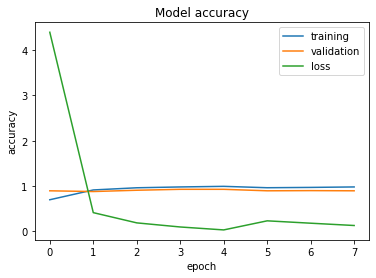

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()